In [12]:
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('data/HE_2013_M25LM326_6_10.csv', delimiter=';', parse_dates=['date'])
df

,link_ID,date,travel_time_log,travel_time,flow,speed,length,q
0,LM326,2013-06-01 00:00:00,3.699077,39.41,166.0,93.18,1019.999981,1.0
1,LM326,2013-06-01 00:15:00,3.672496,38.35,150.0,95.74,1019.999981,1.0
2,LM326,2013-06-01 00:30:00,3.725934,40.51,141.0,90.65,1019.999981,1.0
3,LM326,2013-06-01 00:45:00,3.706719,39.72,124.0,92.44,1019.999981,1.0
4,LM326,2013-06-01 01:00:00,3.666889,38.13,112.0,96.31,1019.999981,1.0
5,LM326,2013-06-01 01:15:00,3.706719,39.72,93.0,92.44,1019.999981,1.0
6,LM326,2013-06-01 01:30:00,3.689879,39.04,90.0,94.05,1019.999981,1.0
7,LM326,2013-06-01 01:45:00,3.720620,40.29,89.0,91.14,1019.999981,1.0
8,LM326,2013-06-01 02:00:00,3.727138,40.56,95.0,90.53,1019.999981,1.0
9,LM326,2013-06-01 02:15:00,3.722798,40.38,81.0,90.93,1019.999981,1.0


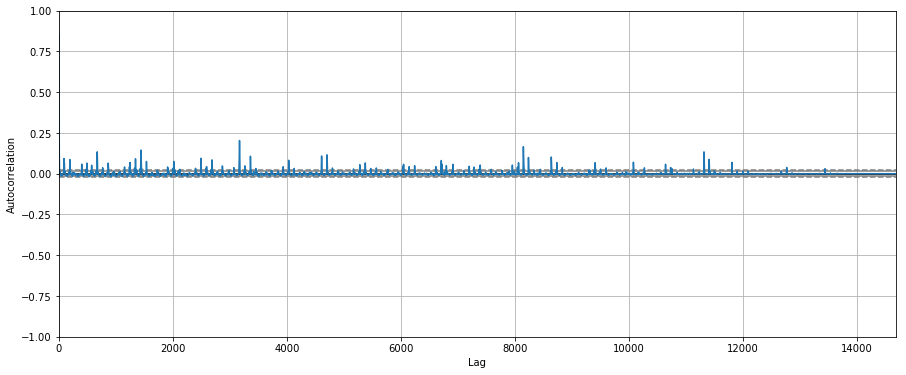

In [21]:
plt.figure(figsize=(15, 6))
pd.tools.plotting.autocorrelation_plot(df['travel_time'])
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller

def testStationary(data, max_lag=None):
    # 原假设为信号为非平稳
    '''
    adf is -4.85811662327 ,pvalue is 4.204754858e-05.usedlag=44
    nobs is 17627,icbest is -320762.899743
    '''
    if max_lag == None:
        adf_result = adfuller(data)
    else:
        adf_result = adfuller(data, maxlag=max_lag)

    if adf_result[1] < 0.05:
        return True
    elif adf_result[1] < 0.1:
        print 'adf is {0} ,pvalue is {1}.usedlag={2}'.format(adf_result[0], adf_result[1], adf_result[2])
        print 'nobs is {0},icbest is {1}'.format(adf_result[3], adf_result[5])
        return True
    else:
        print 'adf is {0} ,pvalue is {1}.usedlag={2}'.format(adf_result[0], adf_result[1], adf_result[2])
        print 'nobs is {0},icbest is {1}'.format(adf_result[3], adf_result[5])
        print 'data is not stationary'
        return False

In [25]:
adfuller(df['travel_time'].values)

(-28.387161753949815,
 0.0,
 11,
 14676,
 {'1%': -3.4307956557741166,
  '10%': -2.5668748372445438,
  '5%': -2.8617369602537566},
 105287.2526178392)

In [26]:
testStationary(df['travel_time'].values)

True

In [39]:
print 'Results of Dickey-Fuller Test:'
dftest = adfuller(df['travel_time'].values[200:300])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print dfoutput

Results of Dickey-Fuller Test:
Test Statistic                 -4.357958
p-value                         0.000352
#Lags Used                      2.000000
Number of Observations Used    97.000000
Critical Value (5%)            -2.891831
Critical Value (1%)            -3.499637
Critical Value (10%)           -2.582928
dtype: float64


In [45]:
def testRandomness(data, max_lag=None):
    # 原假设为信号为白噪声
    corr_result = acorr_ljungbox(data, lags=max_lag)
    if corr_result[1][-1] < 0.05:
        # print 'test randomness lbvalue is {0}, pvalue is
        # {1}'.format(corr_result[0],corr_result[1])
        print 'data is not white noise'
        return False
    else:
        # print 'test randomness lbvalue is {0}, pvalue is
        # {1}'.format(corr_result[0],corr_result[1])
        return True

In [46]:
testRandomness(df['travel_time'])

data is not white noise


False

In [ ]:
def plotACF(df, y_col_name, window_len, moving_len, acf_lag, pacf_lag, datetime_delimiter):
    length = len(df)
    print 'the data length for test stationary is %d' % length
    df_temp = df
    rows = (length - window_len) / moving_len
    # ix按照行索引寻找数据，按照行索引时先要把重新排序索引
    for index in range(0, 2):
        df_temp = df.iloc[
            index * moving_len:index * moving_len + window_len]
        print 'df temp length is %d' % (len(df_temp))
        if self.testStationary(df_temp[y_col_name].values) and not (self.testRandomness(df_temp[y_col_name].values)):
            fig = plot_acf(df_temp[y_col_name], lags=acf_lag)
            fig2 = plot_pacf(df_temp[y_col_name], lags=pacf_lag)
    plt.show()

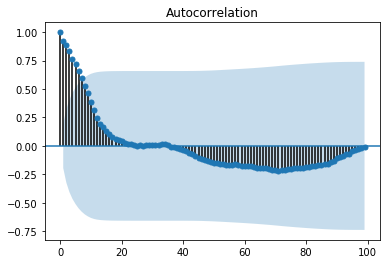

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['travel_time'][:100])
plt.show()

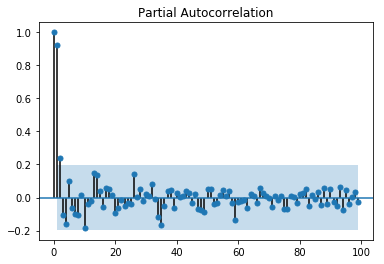

In [61]:
plot_pacf(df['travel_time'][:100])
plt.show()